# Stochastic Simulation algorithm: Gillespie 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

### Arrays in NumPy

In [2]:
arr = np.array([[0,2,4],[6,8,10]]) 
app_arr=np.append(arr, [[5,7,9],[1,13,15]],axis = 0)
app_arr

array([[ 0,  2,  4],
       [ 6,  8, 10],
       [ 5,  7,  9],
       [ 1, 13, 15]])

In [30]:
app_arr[-1]

array([ 1, 13, 15])

In [17]:
arr = np.array([[0,2,4],[6,8,10]]) 
app_arr=np.append(arr, [[5,7,9],[13,15,17]],axis = 1) 
app_arr

array([[ 0,  2,  4,  5,  7,  9],
       [ 6,  8, 10, 13, 15, 17]])

In [38]:
arr[-1]

array([ 6,  8, 10])

In [2]:
# X0 starting state
# T  list of jumping times
# tend stop when reaching this time
# M  stoichiometric matrix
# k  list of reaction constants
# prop_f function that computes the porpensities of each reaction

def ssa_step(X0,T,tend,M,k,prop_f,batch_size=1000):
    

    x0 = X0[-1]  # take last value
    t  = T[-1]   # take last time
    K  = M.shape[0] # number of reactions

    newX = np.zeros( [batch_size,len(x0)] ) # we create a new matrix of values, that will be filled one at a time
                                            # If it is not big enough, we will enlarge it
    newT = np.zeros( batch_size ) 
    
    index = 0 # this is the index to the current position in the matrix.
    while t<tend:
        a = prop_f(x0,k)
        a_tot = sum(a)
        if a_tot==0.0:
            break
        a = a/a_tot
        
        r1 = np.random.random() # random number to compute jumping time
        tau = 1/a_tot * np.log(1/r1) #
        
        newT[index] = t = t + tau

        r2 = np.random.random() # random number to select reaction
        
        acum = 0.0
        reaction = 0
        for i in range(K): # number of reactions
            acum += a[i]
            reaction = i
            if acum>r2:
                break;    
            
        #print(index,r1," ",r2," ",a," ",t," react ", i," of ",K,"\n")
        newX[index] = x0 = x0 + M[reaction]
        index += 1
        
        if index%batch_size == 0: # if you filled the whole batch, add more space
            newX = np.append(newX,np.zeros( [batch_size,len(x0)] ),axis=0)
            newT = np.append(newT,np.zeros( batch_size ))
            
    return np.append(X0,newX[0:index,:],axis=0), np.append(T,newT[0:index])  
#def ssa_step(X0,M,prop_f):    

## Drunken man

In [331]:
# Drunken man setting
# bed -[β]-> bath
# bed -[β]-> living
# bath -[β]-> bed
# bath -[β]-> living
# living -[η]-> bed
# living -[η]-> bath
# living -[η]-> kitchen
# kitchen -[δ]-> living


#     I -[μ]-> R

np.random.seed(123)

def propensity_f(x,k):
    # this function you have to fill with the reactions speeds.
    
    #print(x,"\n",k,"\n")
    return np.array([k[0]*x[0]/2,
                     k[0]*x[0]/2,
                     k[0]*x[1]/2,
                     k[0]*x[1]/2,
                     k[0]*x[2]/3,
                     k[0]*x[2]/3,
                     k[0]*x[2]/3,
                     k[0]*x[3] ] )

X0 = np.zeros([1,4])
X0[0] = [10000, 0, 0, 0]
T = np.zeros(1)

M = np.array([[-1, 1, 0, 0] ,# Infectious reaction
              [-1,0 , 1, 0] ,
              [1 ,-1 , 0, 0] ,
              [0 ,-1 , 1, 0] ,
              [1 , 0 , -1, 0] ,
              [0 , 1 , -1, 0] ,
              [0 , 0 , -1, 1] ,
              [0 , 0 , 1, -1] 
             ]) # Recovery reaction

k = np.array([0.1] )  # overall rate

In [332]:
X0, T = ssa_step(X0,T,50.0,M,k,propensity_f)

 Had to extend it  1000
 Had to extend it  2000
 Had to extend it  3000
 Had to extend it  4000
 Had to extend it  5000
 Had to extend it  6000
 Had to extend it  7000
 Had to extend it  8000
 Had to extend it  9000
 Had to extend it  10000
 Had to extend it  11000
 Had to extend it  12000
 Had to extend it  13000
 Had to extend it  14000
 Had to extend it  15000
 Had to extend it  16000
 Had to extend it  17000
 Had to extend it  18000
 Had to extend it  19000
 Had to extend it  20000
 Had to extend it  21000
 Had to extend it  22000
 Had to extend it  23000
 Had to extend it  24000
 Had to extend it  25000
 Had to extend it  26000
 Had to extend it  27000
 Had to extend it  28000
 Had to extend it  29000
 Had to extend it  30000
 Had to extend it  31000
 Had to extend it  32000
 Had to extend it  33000
 Had to extend it  34000
 Had to extend it  35000
 Had to extend it  36000
 Had to extend it  37000
 Had to extend it  38000
 Had to extend it  39000
 Had to extend it  40000
 Had to e

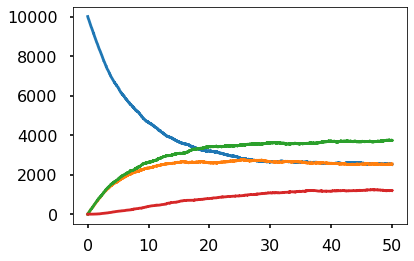

In [333]:
plt.plot(T,X0[:,0])
plt.plot(T,X0[:,1])
plt.plot(T,X0[:,2])
plt.plot(T,X0[:,3])

### Testing the solution is correct:

In [341]:
print("Gillespie  converged  to:",X0[-1],"\nAnalytical prediction is:",np.array([2,2,3,1]) /(2+3+2+1))

Gillespie  converged  to: [2523. 2541. 3731. 1205.] 
Analytical prediction is: [0.25  0.25  0.375 0.125]


## SIR model

In [346]:
# SIR setting
# S + I -[β]-> 2 I
#     I -[μ]-> R

def propensity_f(x,k):
    # this function you have to fill with the reactions speeds.
    
    #print(x,"\n",k,"\n")
    tot = sum(x)
    return np.array([k[0]*x[0]*x[1]/tot, 
                     k[1]*x[1] ] )


In [356]:
np.random.seed(2521623)

X0 = np.zeros([1,3])
X0[0] = [990 , 10, 0]
T = np.zeros(1)

M = np.array([[-1, 1, 0] ,# Infectious reaction
              [0,-1,1] ]) # Recovery reaction

k = np.array([0.02, 0.01] )  # contact rate and recovery rate

 Had to extend it  1000


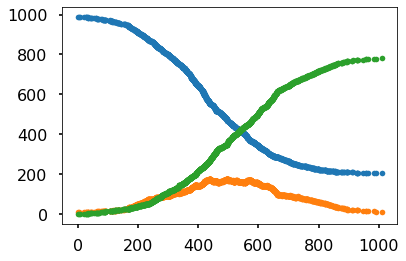

In [357]:
X0, T = ssa_step(X0,T,1000.0,M,k,propensity_f)
plt.plot(T,X0[:,0],".")
plt.plot(T,X0[:,1],".")
plt.plot(T,X0[:,2],".")

In [351]:
for i in range(10):
    X0, T = ssa_step(X0,T,1000.0,M,k,propensity_f)
    X0[-1] = X0[0]
    T[-1] = 0

 Had to extend it  1000
 Had to extend it  1000
 Had to extend it  1000
 Had to extend it  1000
 Had to extend it  1000
 Had to extend it  1000
 Had to extend it  1000
 Had to extend it  1000
 Had to extend it  1000
 Had to extend it  1000


In [353]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

#plt.style.use('seaborn-poster')
%matplotlib inline


In [354]:
β=0.02
μ=0.01
F = lambda t, s: [-β*s[0]*s[1],
                  β*s[0]*s[1]-μ * s[1], 
                  μ * s[1]]
tmax = 1000
t_eval = np.arange(0, tmax+0.01, 0.01)
sol = solve_ivp(F, [0, tmax],[0.99, 0.01,0.0], t_eval=t_eval)

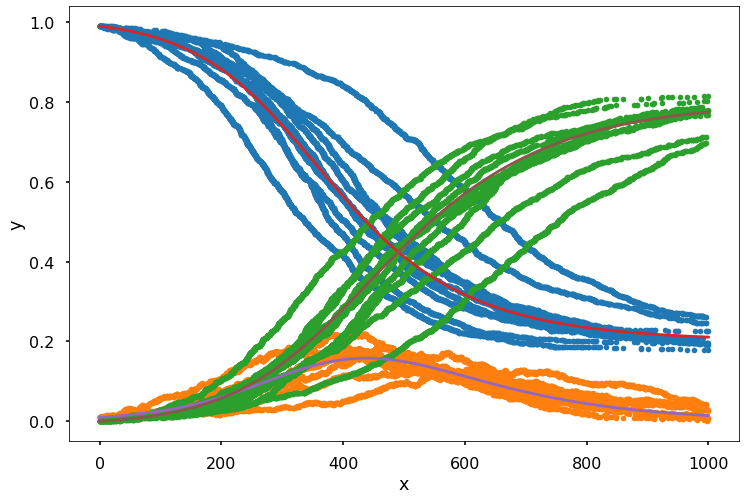

In [355]:
plt.figure(figsize = (12, 8))
plt.plot(T,X0[:,0]/1000.0,".")
plt.plot(T,X0[:,1]/1000.0,".")
plt.plot(T,X0[:,2]/1000.0,".")
plt.plot(t_eval,sol.y.T[:, 0])
plt.plot(t_eval,sol.y.T[:, 1])
plt.plot(t_eval,sol.y.T[:, 2])
#, sol.y.T[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [303]:
T[-1]

10018.821410732246

## SIRS and endemic transition

In [3]:
# SIRS setting
# S + I -[β]-> 2 I
#     I -[μ]-> R
#     R -[η]-> S

def propensity_f(x,k):
    # this function you have to fill with the reactions speeds.
    
    #print(x,"\n",k,"\n")
    tot = sum(x)
    return np.array([k[0]*x[0]*x[1]/tot, 
                     k[1]*x[1], k[2]*x[2] ]  )


In [4]:
np.random.seed(2521623)

X0 = np.zeros([1,3])
X0[0] = [333 , 333, 334]
T = np.zeros(1)

M = np.array([[-1, 1, 0] ,# Infectious reaction
              [0,-1,1] , # I->R Recovery reaction
              [1,0,-1] ]) # R->S

k = np.array([0.02, 0.01, 0.01] )  # contact rate and recovery rate

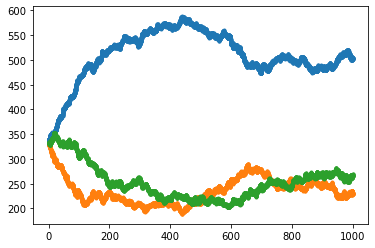

In [5]:
X0, T = ssa_step(X0,T,1000.0,M,k,propensity_f)
plt.plot(T,X0[:,0],".")
plt.plot(T,X0[:,1],".")
plt.plot(T,X0[:,2],".")

In [6]:
for i in range(10):
    X0, T = ssa_step(X0,T,1000.0,M,k,propensity_f)
    X0[-1] = X0[0]
    T[-1] = 0

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

#plt.style.use('seaborn-poster')
%matplotlib inline


In [8]:
β=0.02
μ=0.01
η=0.01
F = lambda t, s: [-β*s[0]*s[1]+η*s[2],
                  β*s[0]*s[1]-μ * s[1], 
                  μ * s[1]-η*s[2]]
tmax = 1000
t_eval = np.arange(0, tmax+0.01, 0.01)
sol = solve_ivp(F, [0, tmax],[0.333, 0.333,0.334], t_eval=t_eval)

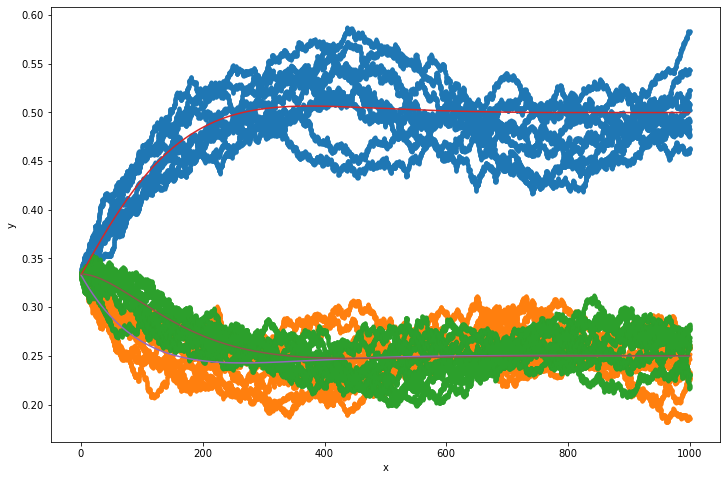

In [9]:
plt.figure(figsize = (12, 8))
plt.plot(T,X0[:,0]/1000.0,".")
plt.plot(T,X0[:,1]/1000.0,".")
plt.plot(T,X0[:,2]/1000.0,".")
plt.plot(t_eval,sol.y.T[:, 0])
plt.plot(t_eval,sol.y.T[:, 1])
plt.plot(t_eval,sol.y.T[:, 2])
#, sol.y.T[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

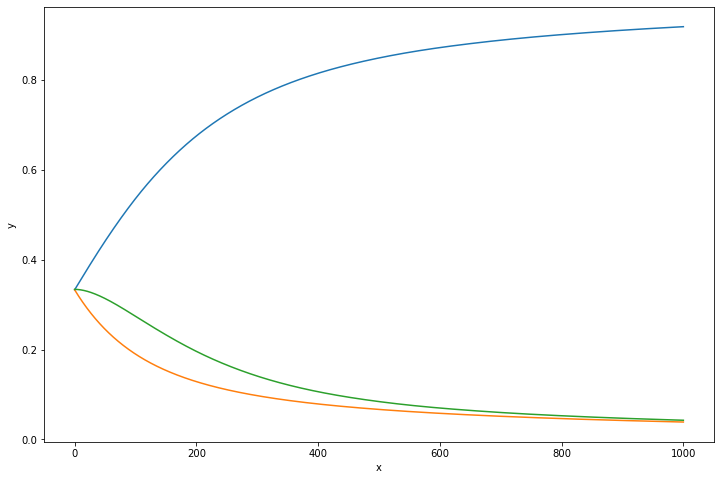

In [27]:
β=0.01
μ=0.01
η=0.01
F = lambda t, s: [-β*s[0]*s[1]+η*s[2],
                  β*s[0]*s[1]-μ * s[1], 
                  μ * s[1]-η*s[2]]
tmax = 1000
t_eval = np.arange(0, tmax+0.01, 0.01)
sol = solve_ivp(F, [0, tmax],[0.333, 0.333,0.334], t_eval=t_eval)

plt.figure(figsize = (12, 8))
plt.plot(t_eval,sol.y.T[:, 0])
plt.plot(t_eval,sol.y.T[:, 1])
plt.plot(t_eval,sol.y.T[:, 2])
#, sol.y.T[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()